In [1]:
# References:
# * Took 3D visualization code from https://www.kaggle.com/zstusnoopy/visualize-the-location-and-3d-bounding-box-of-car
# * CenterNet paper https://arxiv.org/pdf/1904.07850.pdf
# * CenterNet repository https://github.com/xingyizhou/CenterNet

In [2]:
import numpy as np 
import pandas as pd
import cv2
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sb
import os

In [20]:
df_train = pd.read_csv('../Resources/train.csv')
path_dir = '../Resources/'
# From camera.zip
camera_matrix = np.array([[2304.5479, 0,  1686.2379], [0, 2305.8757, 1354.9849], [0, 0, 1]], dtype=np.float32)

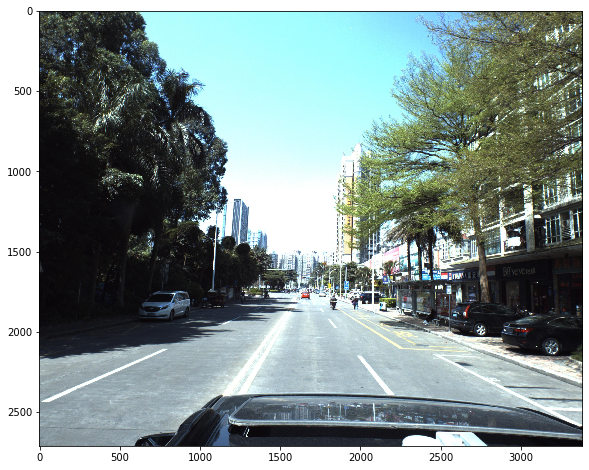

In [13]:
def im_read(path, fast_mode = False):
    img = cv2.imread(path)
    if not fast_mode and img is not None and len(img.shape) == 3:
        img = np.array(img[:, :, ::-1])
    return img
img = im_read(path_dir + 'train_images/ID_8a6e65317' + '.jpg')
img_shape = img.shape

plt.figure(figsize=(15,8))
plt.imshow(img);

In [18]:
# Input: s: PredictionString; names: array of what to extract from the string
# Output: list of dicts with keys from `names`
def str2cor(s, names=['id', 'yaw', 'pitch', 'roll', 'x', 'y', 'z']):
    coords = []
    for l in np.array(s.split(' ')).reshape([-1, 7]):
        coords.append(dict(zip(names, l.astype('float32'))))
        if 'id' in coords[-1]:
            coords[-1]['id'] = int(coords[-1]['id'])
    return coords

In [19]:
print(str2cor(df_train['PredictionString'][0]))

[{'id': 16, 'yaw': 0.254839, 'pitch': -2.57534, 'roll': -3.10256, 'x': 7.96539, 'y': 3.20066, 'z': 11.0225}, {'id': 56, 'yaw': 0.181647, 'pitch': -1.46947, 'roll': -3.12159, 'x': 9.60332, 'y': 4.66632, 'z': 19.339}, {'id': 70, 'yaw': 0.163072, 'pitch': -1.56865, 'roll': -3.11754, 'x': 10.39, 'y': 11.2219, 'z': 59.7825}, {'id': 70, 'yaw': 0.141942, 'pitch': -3.1395, 'roll': 3.11969, 'x': -9.59236, 'y': 5.13662, 'z': 24.7337}, {'id': 46, 'yaw': 0.163068, 'pitch': -2.08578, 'roll': -3.11754, 'x': 9.83335, 'y': 13.2689, 'z': 72.9323}]


In [21]:
# 2D visualization
# Input is a PredictionString (e.g. from train dataframe)
# Output is two arrays: xs: x coordinates in the image ys: y coordinates in the image
def get_img_coords(s):
    coords = str2cor(s)
    x = [i['x'] for i in coords]
    y = [i['y'] for i in coords]
    z = [i['z'] for i in coords]
    P = np.array(list(zip(x, y, z))).T
    img_p = np.dot(camera_matrix, P).T
    img_p[:, 0] /= img_p[:, 2]
    img_p[:, 1] /= img_p[:, 2]
    img_xs = img_p[:, 0]
    img_ys = img_p[:, 1]
    img_zs = img_p[:, 2]
    return img_xs, img_ys

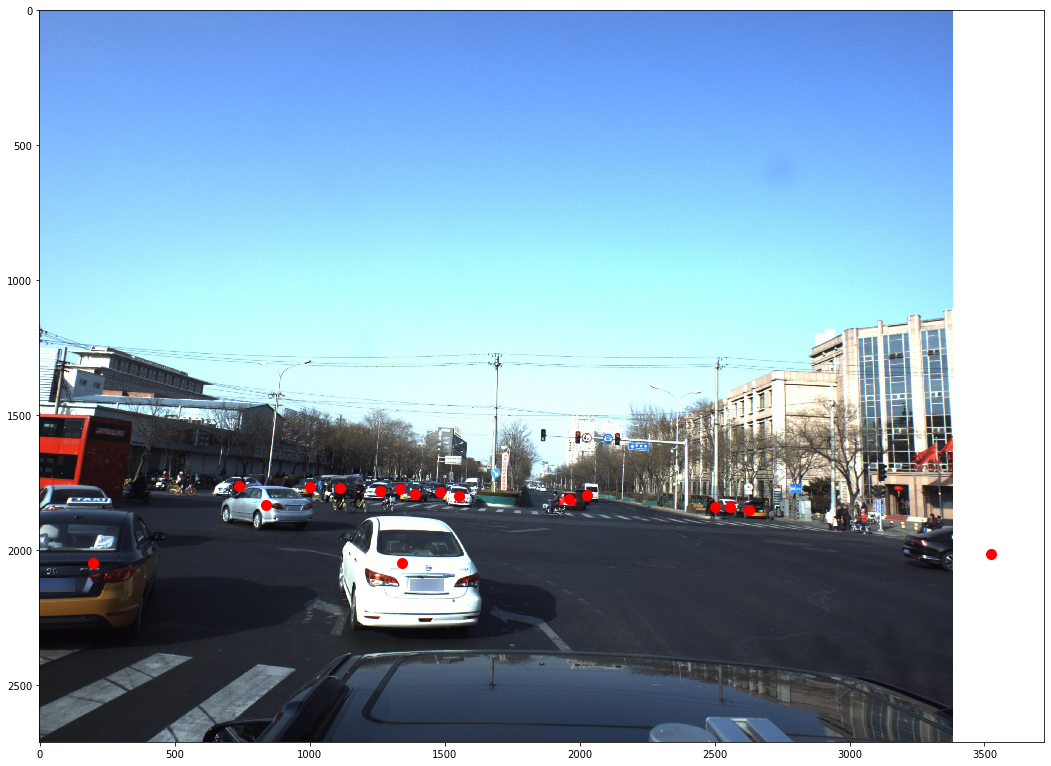

In [23]:
plt.figure(figsize=(18,14))
plt.imshow(im_read(path_dir + 'train_images/' + df_train['ImageId'][2217] + '.jpg'))
plt.scatter(*get_img_coords(df_train['PredictionString'][2217]), color='red', s=100);
plt.savefig("./Output/png/221&_id_point.png", bbox_inches = 'tight', dpi = 300)

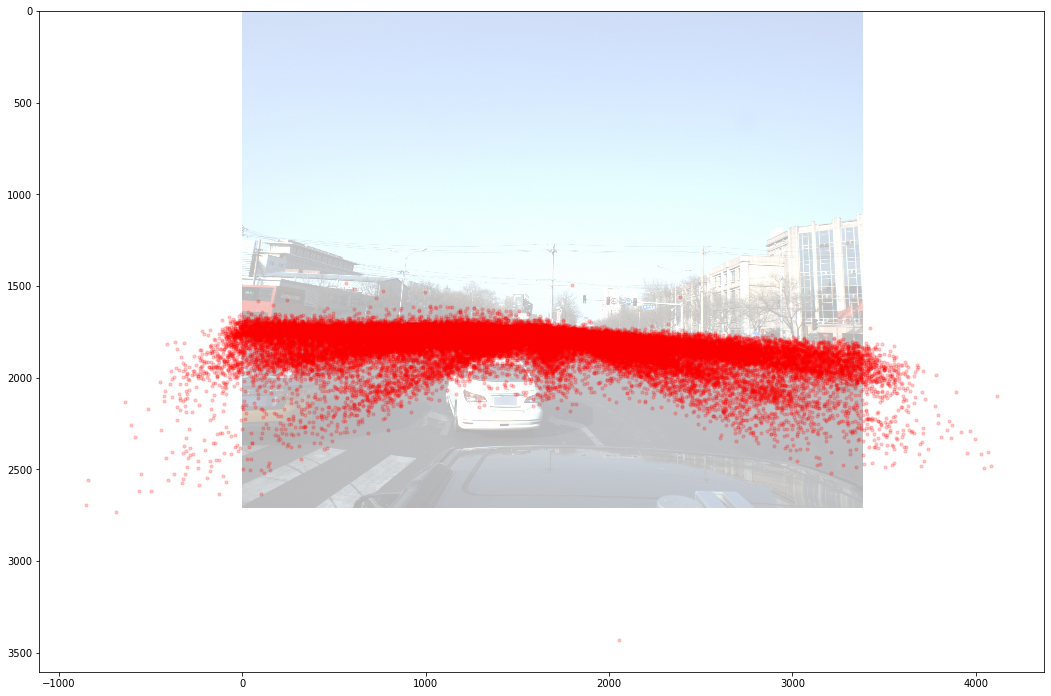

In [25]:
# the distribution of all points
xs, ys = [], []

for ps in df_train['PredictionString']:
    x, y = get_img_coords(ps)
    xs += list(x)
    ys += list(y)

plt.figure(figsize=(18,18))
plt.imshow(im_read(path_dir + 'train_images/' + df_train['ImageId'][2217] + '.jpg'), alpha=0.3)
plt.scatter(xs, ys, color='red', s=10, alpha=0.2);
plt.savefig("./Output/png/point_dist.png", bbox_inches = 'tight', dpi = 300)

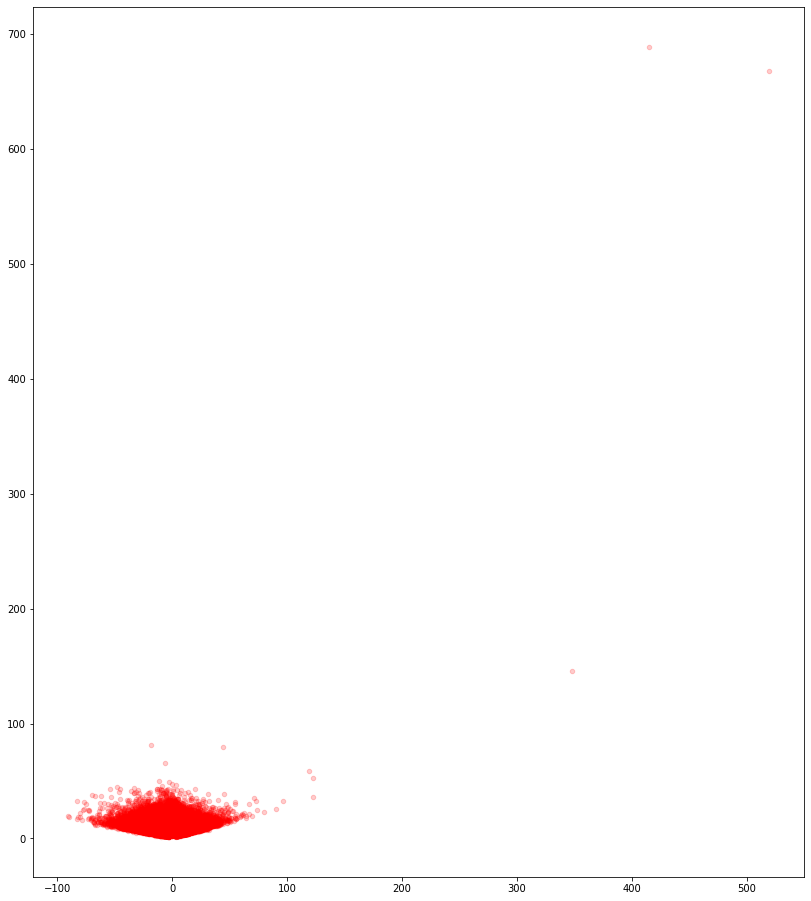

In [31]:
# distribution of real image inside of camera
xs, ys = [], []
for ps in df_train['PredictionString']:
    coords = str2cor(ps)
    xs += [c['x'] for c in coords]
    ys += [c['y'] for c in coords]
plt.figure(figsize=(16,16))
plt.axes().set_aspect(1)
# View cars
plt.scatter(xs, ys, color='red', s=20, alpha=0.2);

[ 718.29297  891.6832   983.90094 1114.4086  1171.5646  1254.0594
  773.2546  1024.0345  1690.4922  2269.3362 ]
[7.96539, 9.60332, 10.39, -9.59236, 9.83335, -3.17424, -14.7269, -7.49818, -10.3531, -22.7711]
